# Twitter Sentiment Analysis

## Download Needed Libraries

In [1]:
!pip install spacy

## Import Needed Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## EDA

#### Read data

In [3]:
df = pd.read_csv('/content/twitter_training.csv')
test_df = pd.read_csv('/content/twitter_validation.csv')

#### Display few rows

In [4]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
test_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


#### Display some information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

## Data Preprocessing

#### Rename columns

In [8]:
df.columns = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']
test_df.columns = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']

#### See data imbalance

In [9]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,22542
Positive,20831
Neutral,18318
Irrelevant,12990


In [10]:
test_df['sentiment'].value_counts()

,count
sentiment,
Neutral,285
Positive,277
Negative,266
Irrelevant,171


#### Drop unneeded columns

In [11]:
df.drop(columns=['Tweet ID', 'entity'], axis=1, inplace=True)
test_df.drop(columns=['Tweet ID', 'entity'], axis=1, inplace=True)

#### Drop null values

In [12]:
df = df.dropna(subset=['Tweet content'])

In [13]:
df.isnull().sum()

,0
sentiment,0
Tweet content,0


#### Text cleaning: Tokenization / stop word removal / punctuation removal

In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [15]:
def Preprocessing(text):
    doc = nlp(text)
    filtered_data = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_data.append(token.lemma_)

    return " ".join(filtered_data)

In [16]:
df['Preprocessed Tweet'] = df['Tweet content'].apply(Preprocessing)
test_df['Preprocessed Tweet'] = test_df['Tweet content'].apply(Preprocessing)

#### Target Encoding

In [17]:
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['sentiment'])
test_df['Label'] = encoder.fit_transform(test_df['sentiment'])

#### Defining features and target

In [18]:
X_train = df['Preprocessed Tweet']
y_train = df['Label']
X_test = test_df['Preprocessed Tweet']
y_test = test_df['Label']

#### Applying TF-IDF Transformation

In [19]:
v = TfidfVectorizer()
X_train = v.fit_transform(X_train)
X_test = v.transform(X_test)

## Models

#### Logistic Regression

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
lr.score(X_train, y_train)

0.8455571322386648

In [22]:
y_pred = lr.predict(X_test)

In [23]:
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

0.8978978978978979


In [24]:
lr_cr = classification_report(y_test, y_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       171
           1       0.86      0.94      0.90       266
           2       0.93      0.87      0.90       285
           3       0.88      0.90      0.89       277

    accuracy                           0.90       999
   macro avg       0.90      0.90      0.90       999
weighted avg       0.90      0.90      0.90       999



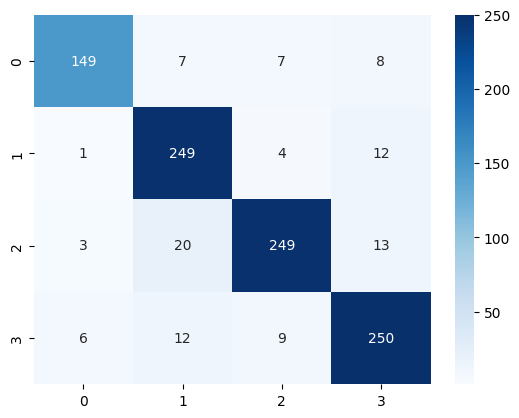

In [25]:
lr_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(lr_cm, annot=True, fmt='0.0f', cmap='Blues')
plt.show()

#### Random Forest

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
rf.score(X_train, y_train)

0.9708899249949321

In [28]:
y_pred = rf.predict(X_test)

In [29]:
rf_acc = accuracy_score(y_test, y_pred)
print(rf_acc)

0.9479479479479479


In [30]:
rf_cr = classification_report(y_test, y_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       171
           1       0.95      0.95      0.95       266
           2       0.92      0.97      0.95       285
           3       0.95      0.95      0.95       277

    accuracy                           0.95       999
   macro avg       0.95      0.94      0.95       999
weighted avg       0.95      0.95      0.95       999



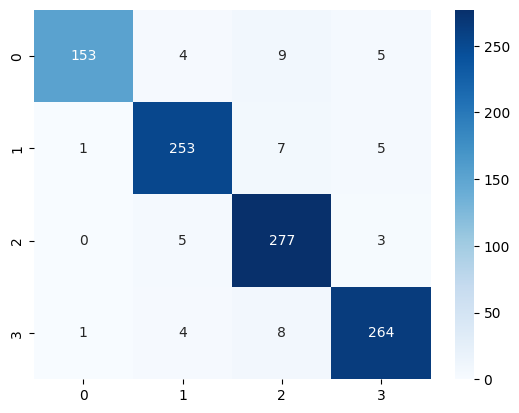

In [31]:
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, annot=True, fmt='0.0f', cmap='Blues')
plt.show()

#### XGBOOST

In [32]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
xgb.score(X_train, y_train)

0.702736671396716

In [34]:
y_pred = xgb.predict(X_test)

In [35]:
xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.7497497497497497


In [36]:
xgb_cr = classification_report(y_test, y_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.86      0.59      0.70       171
           1       0.66      0.89      0.76       266
           2       0.80      0.68      0.73       285
           3       0.77      0.79      0.78       277

    accuracy                           0.75       999
   macro avg       0.77      0.74      0.74       999
weighted avg       0.77      0.75      0.75       999



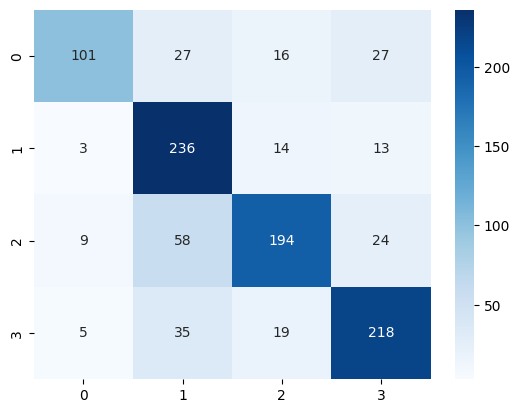

In [37]:
xgb_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(xgb_cm, annot=True, fmt='0.0f', cmap='Blues')
plt.show()

#### ANN

In [38]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 138s 58ms/step - accuracy: 0.6309 - loss: 0.8882 - val_accuracy: 0.9540 - val_loss: 0.1515
Epoch 2/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 149s 65ms/step - accuracy: 0.9217 - loss: 0.2131 - val_accuracy: 0.9710 - val_loss: 0.1233
Epoch 3/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 140s 60ms/step - accuracy: 0.9503 - loss: 0.1279 - val_accuracy: 0.9710 - val_loss: 0.1314
Epoch 4/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 139s 59ms/step - accuracy: 0.9575 - loss: 0.1031 - val_accuracy: 0.9690 - val_loss: 0.1336
Epoch 5/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 139s 58ms/step - accuracy: 0.9634 - loss: 0.0868 - val_accuracy: 0.9720 - val_loss: 0.1472
Epoch 6/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 135s 58ms/step - accuracy: 0.9638 - loss: 0.0810 - val_accuracy: 0.9800 - val_loss: 0.1432
Epoch 7/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 137s 56ms/step - accuracy: 0.9651 - loss: 0.0768 - val_accuracy: 0.9750 - val_loss: 0.1624
Epoch 8/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 151s 60ms/step - accuracy: 

In [40]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [41]:
ann_acc = accuracy_score(y_test, y_pred.argmax(axis=1))
print(ann_acc)

0.978978978978979


In [42]:
ann_cr = classification_report(y_test, y_pred.argmax(axis=1))
print(ann_cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.98      0.98      0.98       266
           2       0.98      0.98      0.98       285
           3       0.99      0.97      0.98       277

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999



## Compare

In [44]:
print("Accuracy\n")
print(f'Logistic      : {lr_acc:.4f}')
print(f'Random Forest : {rf_acc:.4f}')
print(f'XGBOOST       : {xgb_acc:.4f}')
print(f'ANN           : {ann_acc:.4f}')

Accuracy

Logistic      : 0.8979
Random Forest : 0.9479
XGBOOST       : 0.7497
ANN           : 0.9790


In [45]:
print("Classification Report\n")
print(f'Logistic:\n{lr_cr}\n')
print(f'Random Forest:\n{rf_cr}\n')
print(f'XGBOOST:\n{xgb_cr}\n')
print(f'ANN:\n{ann_cr}\n')

Classification Report

Logistic:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       171
           1       0.86      0.94      0.90       266
           2       0.93      0.87      0.90       285
           3       0.88      0.90      0.89       277

    accuracy                           0.90       999
   macro avg       0.90      0.90      0.90       999
weighted avg       0.90      0.90      0.90       999


Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       171
           1       0.95      0.95      0.95       266
           2       0.92      0.97      0.95       285
           3       0.95      0.95      0.95       277

    accuracy                           0.95       999
   macro avg       0.95      0.94      0.95       999
weighted avg       0.95      0.95      0.95       999


XGBOOST:
              precision    recall  f1-score   support

           0    